# **A comprehensive study of the advanced retrieval augmented generation techniques and algorithms, systemising various approaches. The article comes with a collection of links in my knowledge base referencing various implementations and studies mentioned.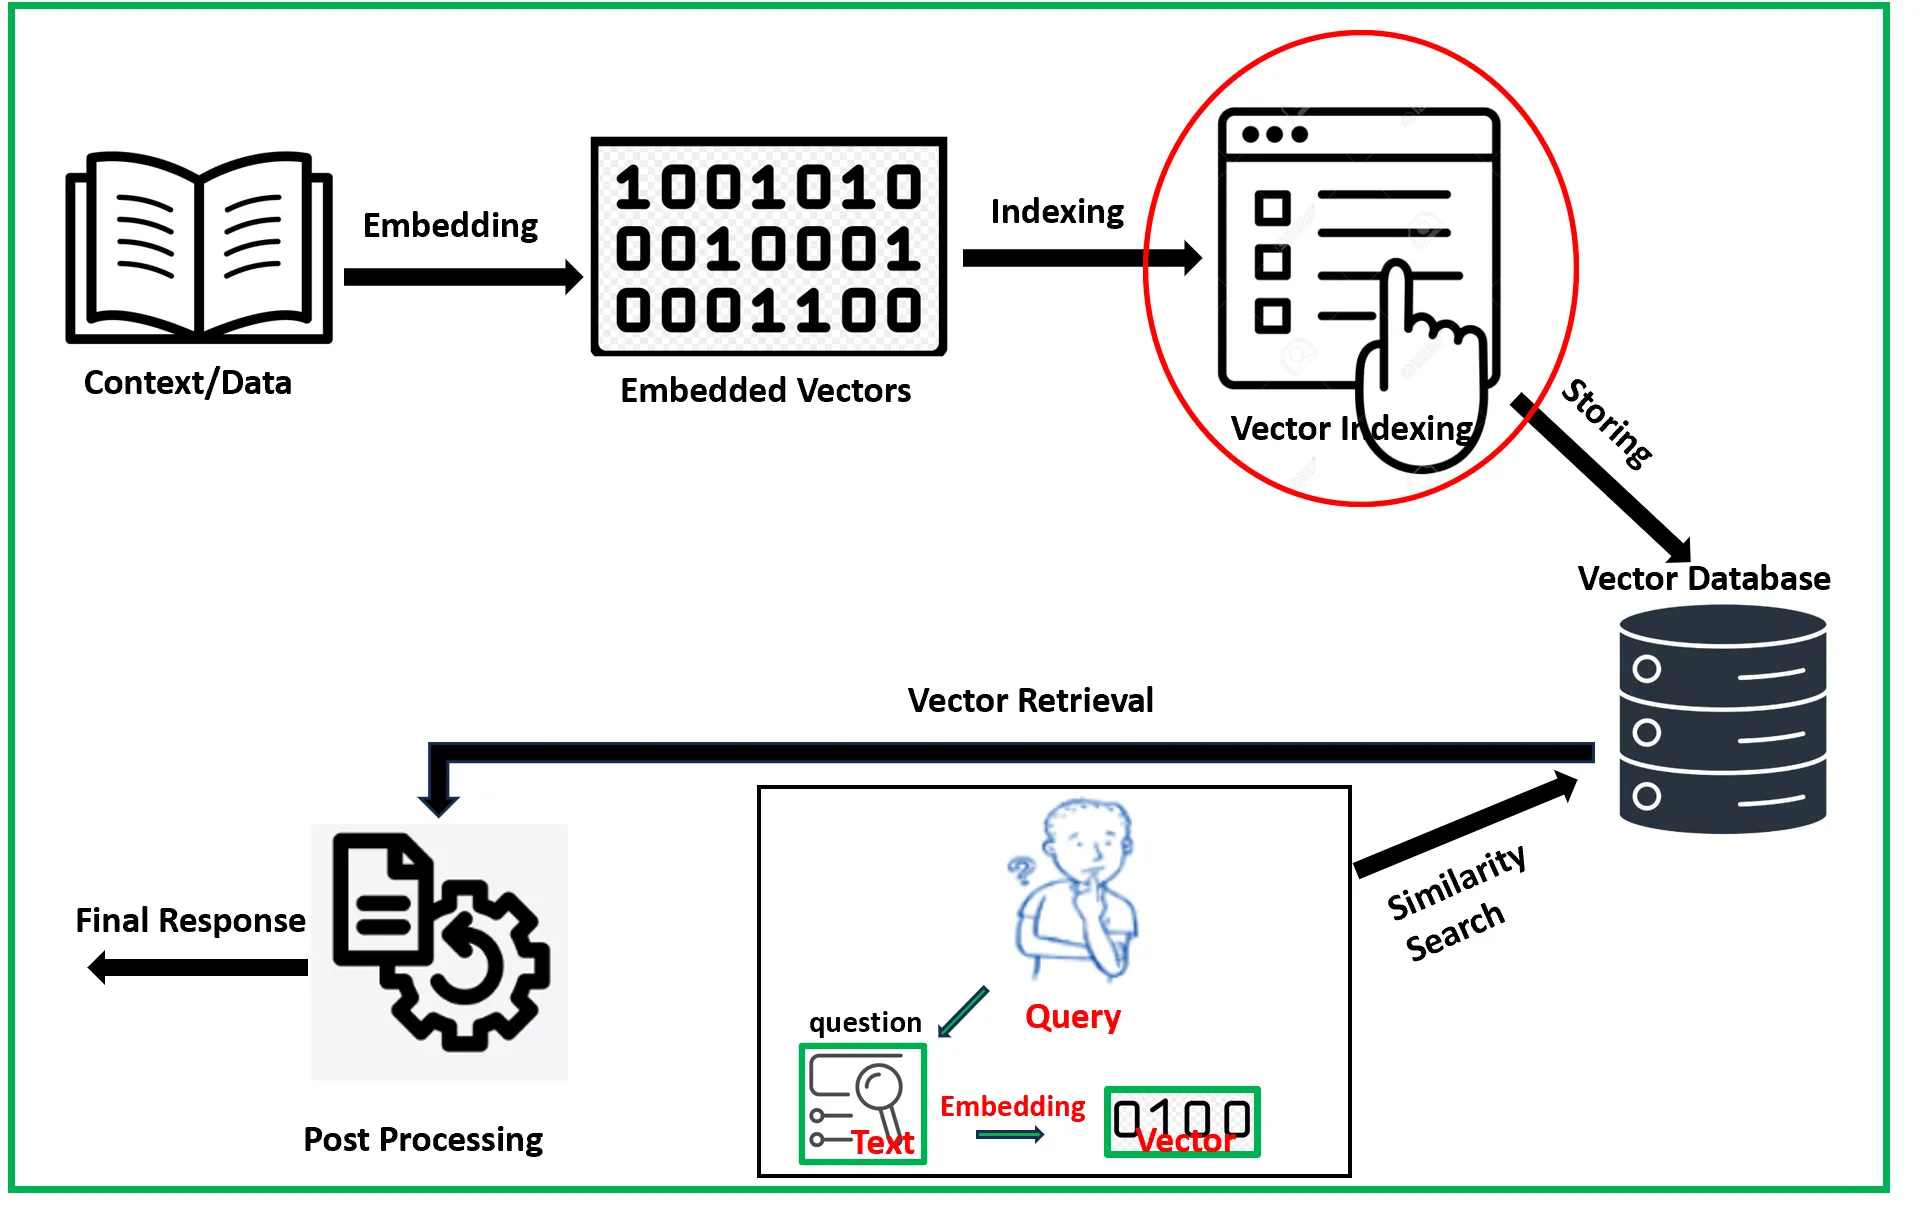**

# Naive RAG

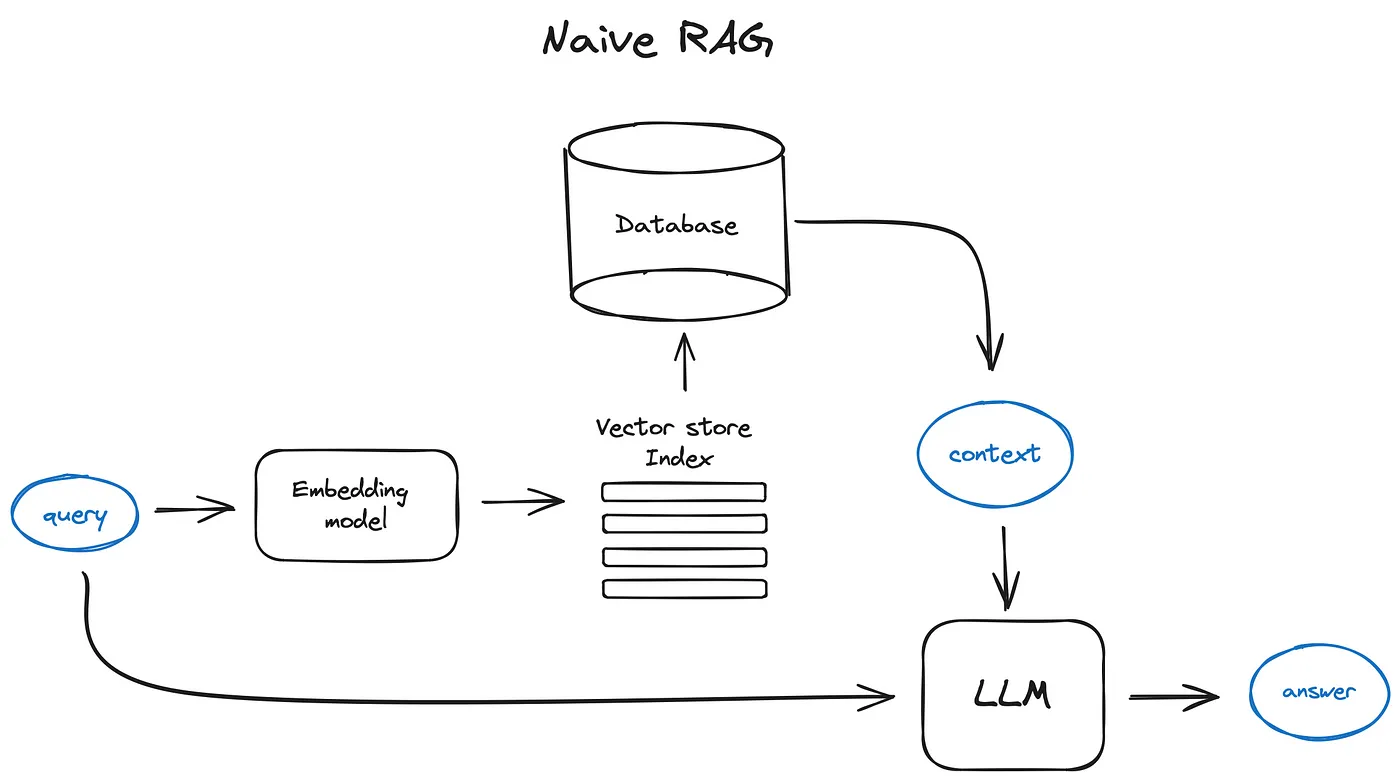

## Overview

### What is RAG?

RAG is a technique for augmenting LLM knowledge with additional, often private or real-time, data.

LLMs can reason about wide-ranging topics, but their knowledge is limited to the public data up to a specific point in time that they were trained on. If you want to build AI applications that can reason about private data or data introduced after a model's cutoff date, you need to augment the knowledge of the model with the specific information it needs. The process of bringing the appropriate information and inserting it into the model prompt is known as Retrieval Augmented Generation (RAG).

### What's in this guide?

LangChain has a number of components specifically designed to help build RAG applications. To familiarize ourselves with these, we'll build a simple question-answering application over a text data source. Specifically, we'll build a QA bot over the [LLM Powered Autonomous Agents](https://lilianweng.github.io/posts/2023-06-23-agent/) blog post by Lilian Weng. Along the way we'll go over a typical QA architecture, discuss the relevant LangChain components, and highlight additional resources for more advanced QA techniques. We'll also see how LangSmith can help us trace and understand our application. LangSmith will become increasingly helpful as our application grows in complexity.

**Note**
Here we focus on RAG for unstructured data. Two RAG use cases which we cover elsewhere are:
- [QA over structured data](/docs/use_cases/qa_structured/sql) (e.g., SQL)
- [QA over code](/docs/use_cases/question_answering/code_understanding) (e.g., Python)

## Architecture
A typical RAG application has two main components:

**Indexing**: a pipeline for ingesting data from a source and indexing it. *This usually happen offline.*

**Retrieval and generation**: the actual RAG chain, which takes the user query at run time and retrieves the relevant data from the index, then passes that to the model.

The most common full sequence from raw data to answer looks like:

#### Indexing
1. **Load**: First we need to load our data. We'll use [DocumentLoaders](/docs/modules/data_connection/document_loaders/) for this.
2. **Split**: [Text splitters](/docs/modules/data_connection/document_transformers/) break large `Documents` into smaller chunks. This is useful both for indexing data and for passing it in to a model, since large chunks are harder to search over and won't fit in a model's finite context window.
3. **Store**: We need somewhere to store and index our splits, so that they can later be searched over. This is often done using a [VectorStore](/docs/modules/data_connection/vectorstores/) and [Embeddings](/docs/modules/data_connection/text_embedding/) model.


#### Retrieval and generation
4. **Retrieve**: Given a user input, relevant splits are retrieved from storage using a [Retriever](/docs/modules/data_connection/retrievers/).
5. **Generate**: A [ChatModel](/docs/modules/model_io/chat_models) / [LLM](/docs/modules/model_io/llms/) produces an answer using a prompt that includes the question and the retrieved data


## Setup

### Dependencies

We will have to install the required libraries before proceeding further. whatever framework we are using we'll install it and specify the workings of it

# **LOADING THE DATA(Website page doc or text file,pdf file)**

## **Langchain way of loading...**

In [ ]:
!pip install --upgrade pip

In [2]:
!pip3 install -U -q  deeplake llama_index langchain openai tiktoken cohere pandas torch sentence-transformers
# here bs4 is beautiful soup for web page loading

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 583.8/583.8 kB 5.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 794.4/794.4 kB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.4/225.4 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 49.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.7/51.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 728.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 14.7 MB/s eta 0:00:00
     ━━━

### **Web loading in langchain**

In [ ]:
#All the api keys you can pass while runtime or from .env file. it is your choice
import getpass
import os

os.environ["OPENAI_API_KEY"] = getpass.getpass()

# !pip install python-dotenv
# from dotenv import load_dotenv
# load_dotenv()


··········


In [ ]:
# Showing a method to load website page in langchain
import bs4
from langchain.document_loaders import WebBaseLoader
loader = WebBaseLoader(
    web_paths=("https://lilianweng.github.io/posts/2023-06-23-agent/",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("post-content", "post-title", "post-header")
        )
    ),
)
docs = loader.load()



### **Loading Local Files in langchain**

In [ ]:
from langchain.document_loaders import TextLoader,PyPDFLoader

# just add the filepath inside parameter and if you using pdf then install pypdf
# loader = TextLoader("../../../../../docs/docs/modules/state_of_the_union.txt")
!pip install pypdf
loader = PyPDFLoader("bio.pdf")
docs = loader.load()

In [ ]:
len(docs)

3

## **In LLama-Index way of loading**

### **Web loading in llama**

In [ ]:
pip install -q llama-index

In [ ]:
import logging
import sys

logging.basicConfig(stream=sys.stdout, level=logging.INFO)
logging.getLogger().addHandler(logging.StreamHandler(stream=sys.stdout))

In [ ]:
!pip install -q html2text
# NOTE: the html_to_text=True option requires html2text to be installed

In [ ]:
from llama_index import TrafilaturaWebReader
documents = TrafilaturaWebReader().load_data(
    ["http://paulgraham.com/worked.html"]
)

ImportError: ignored

In [ ]:
pip install pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 4.1 MB/s eta 0:00:00


In [ ]:
from llama_index import SimpleDirectoryReader

reader = SimpleDirectoryReader(input_dir="./")
documents = reader.load_data()

# **Chunking & vectorisation**
First of all we want to create an index of vectors, representing our document contents and then in the runtime to search for the least cosine distance between all these vectors and the query vector which corresponds to the closest semantic meaning.

## **Langchain way of Chunking and Vectorization**

### Chroma datastore

In [3]:
pip install chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.6/508.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.6/105.6 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 7.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 698.9/698.9 kB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40

In [ ]:
from langchain.embeddings import OpenAIEmbeddings
from langchain.schema import StrOutputParser
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma
from langchain_core.runnables import RunnablePassthrough
text_splitter = RecursiveCharacterTextSplitter(chunk_size=512, chunk_overlap=50)
splits = text_splitter.split_documents(docs)

vectorstore = Chroma.from_documents(documents=splits, embedding=OpenAIEmbeddings())
retriever = vectorstore.as_retriever()

### Faiss datastore

In [ ]:
!pip install faiss-cpu
from langchain.vectorstores import FAISS

embeddings = OpenAIEmbeddings()

db = FAISS.from_documents(docs, embedding=OpenAIEmbeddings())
# you can also store vectors in local storage so that you dont have to recreate it again

# db.save_local("faiss_index")

# new_db = FAISS.load_local("faiss_index", embeddings)

# docs = new_db.similarity_search(query)

### Weaviate datastore

In [ ]:
pip install weaviate-client

In [ ]:
from langchain.vectorstores import Weaviate
# using weaviate datastore, you need url and api key
WEAVIATE_URL = getpass.getpass("WEAVIATE_URL:")

os.environ["WEAVIATE_API_KEY"] = getpass.getpass("WEAVIATE_API_KEY:")
WEAVIATE_API_KEY = os.environ["WEAVIATE_API_KEY"]
db = Weaviate.from_documents(docs, embedding=OpenAIEmbeddings(), weaviate_url=WEAVIATE_URL, by_text=False)

WEAVIATE_URL:··········
WEAVIATE_API_KEY:··········


In [ ]:


# client = weaviate.Client(
#   url="https://my-first-cluster-sctkzcpb.weaviate.network",
#   auth_client_secret=auth_config
# )
# api key = FHFLTYHcnp8K5SioBdfVziCunwqYnaSo18wJ

## **Llama-index way of Chunking and Vectorization**

In [ ]:
from llama_index import (
    ServiceContext,
    SimpleDirectoryReader,
    VectorStoreIndex,
)

service_context = ServiceContext.from_defaults(
    chunk_size=512, chunk_overlap=50
)

index = VectorStoreIndex.from_documents(
    documents, service_context=service_context
)

### Node Parser Usage Pattern
Node parsers are a simple abstraction that take a list of documents, and chunk them into Node objects, such that each node is a specific chunk of the parent document. When a document is broken into nodes, all of it’s attributes are inherited to the children nodes (i.e. metadata, text and metadata templates, etc.). You can read more about Node and Document properties

In [ ]:
from llama_index import Document
from llama_index.node_parser import SentenceSplitter
from llama_index.embeddings import HuggingFaceEmbedding
from IPython.display import Markdown, display

node_parser = SentenceSplitter(chunk_size=1024, chunk_overlap=20)
embed_model = HuggingFaceEmbedding(model_name="BAAI/bge-base-en-v1.5")
nodes = node_parser.get_nodes_from_documents(
    documents, show_progress=False
)
service_context = ServiceContext.from_defaults(embed_model=embed_model)
index = VectorStoreIndex(
    nodes, service_context=service_context
)
query_engine = index.as_query_engine()
response = query_engine.query("In Linnaeus' time how many kingdoms was there")
display(Markdown(f"<b>{response}</b>"))

config.json:   0%|          | 0.00/777 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

<b>In Linnaeus' time, there were two kingdoms: Plantae and Animalia.</b>

In [ ]:
# LangchainNodeParser
# You can also wrap any existing text splitter from langchain with a node parser.

from langchain.text_splitter import RecursiveCharacterTextSplitter
from llama_index.node_parser import LangchainNodeParser
from IPython.display import Markdown, display

parser = LangchainNodeParser(RecursiveCharacterTextSplitter())
nodes = parser.get_nodes_from_documents(documents)
index = VectorStoreIndex(
    nodes)
query_engine = index.as_query_engine()
response = query_engine.query("In Linnaeus' time how many kingdoms was there")
display(Markdown(f"<b>{response}</b>"))

<b>In Linnaeus' time, there were two kingdoms: Plantae and Animalia.</b>

### CHromadb with hugging face embeddings

In [5]:
from llama_index import VectorStoreIndex, SimpleDirectoryReader, ServiceContext
from llama_index.vector_stores import ChromaVectorStore
from llama_index.storage.storage_context import StorageContext
from llama_index.embeddings import HuggingFaceEmbedding
from IPython.display import Markdown, display
import chromadb
# create client and a new collection
chroma_client = chromadb.EphemeralClient()
chroma_collection = chroma_client.create_collection("quickstart")

# define embedding function
embed_model = HuggingFaceEmbedding(model_name="BAAI/bge-base-en-v1.5")

# load documents
documents = SimpleDirectoryReader("./").load_data()

# set up ChromaVectorStore and load in data
vector_store = ChromaVectorStore(chroma_collection=chroma_collection)
storage_context = StorageContext.from_defaults(vector_store=vector_store)
service_context = ServiceContext.from_defaults(embed_model=embed_model)
index = VectorStoreIndex.from_documents(
    documents, storage_context=storage_context, service_context=service_context
)


UniqueConstraintError: ignored

# **ADVANCED RAG METHODS**

# **Search Index:**
###The crucial part of the RAG pipeline is the search index, storing your vectorised content we got in the previous step. The most naive implementation uses a flat index — a brute force distance calculation between the query vector and all the chunks’ vectors. Now we will see advanced techniques to effeciently storing indexes so that retrieval will be fast

## **Hierarchical indices**
In case you have many documents to retrieve from, you need to be able to efficiently search inside them, find relevant information and synthesise it in a single answer with references to the sources. An efficient way to do that in case of a large database is to **create two indices — one composed of summaries and the other one composed of document chunks**, and to search in two steps, first filtering out the relevant docs by summaries and then searching just inside this relevant group.

### llama index method

In [1]:
from llama_index.node_parser import SentenceSplitter
from llama_index.schema import IndexNode
from llama_index.response.notebook_utils import display_source_node
from llama_index.retrievers import RecursiveRetriever
from llama_index.query_engine import RetrieverQueryEngine
from llama_index import VectorStoreIndex, ServiceContext
from llama_index.llms import OpenAI
import json
node_parser = SentenceSplitter(chunk_size=1024)
base_nodes = node_parser.get_nodes_from_documents(docs)
# set node ids to be a constant
for idx, node in enumerate(base_nodes):
    node.id_ = f"node-{idx}"
from llama_index.embeddings import resolve_embed_model

embed_model = resolve_embed_model("local:BAAI/bge-small-en")
llm = OpenAI(model="gpt-3.5-turbo")
service_context = ServiceContext.from_defaults(
    llm=llm, embed_model=embed_model
)

base_index = VectorStoreIndex(base_nodes, service_context=service_context)
base_retriever = base_index.as_retriever(similarity_top_k=2)
retrievals = base_retriever.retrieve(
    "Can you tell me about the key concepts for safety finetuning"
)
for n in retrievals:
    display_source_node(n, source_length=1500)
query_engine_base = RetrieverQueryEngine.from_args(
    base_retriever, service_context=service_context
)
response = query_engine_base.query(
    "Can you tell me about the key concepts for safety finetuning"
)
print(str(response))

ModuleNotFoundError: ignored